## Телеком: исследование оттока клиентов

Пока создаётся модель прогнозирования оттока клиентов, отдел маркетинга «Ниединогоразрыва.ком» приступает к проработке способов их удержания. Вам предстоит собрать нужную для этого информацию.

Сравните распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. Для каждой группы посчитайте статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. Постройте гистограммы распределения.

Сравните поведение клиентов этих двух групп. Для каждой постройте два любых графика, изображающих:

- долю пользователей телефонной связи;
- долю интернет-пользователей.

**Вам предстоит построить прототип модели машинного обучения.**

Его разработка состоит из нескольких этапов:
1) Составьте план работы. Исходное условие задачи заведомо неполное и содержит лишнюю информацию. Проведите исследовательский анализ данных, чтобы понять, какие вопросы подготовить.

2) Уточните задачу. Задайте вопросы тимлиду.

3) Разработайте модель. Отдайте код на проверку ревьюверу.

4) Подготовьте отчёт. Отправьте отчёт тимлиду, чтобы он проверил успешность выполнения задания.

*Примечание: От качества вашей модели зависит итоговая оценка. Критериями оценки поделится куратор после уточнения задачи у тимлида.*

## План работы

В интеллектуальном анализе данных широко используется методология межотраслевого процесса интеллектуального анализа данных (CRISP-DM). Попробую в рамках подготовки данного плана работы поэкспериментировать и воспользоваться данной методологией.
CRISP-DM состоит из шести шагов с организацией, которую необходимо реализовать, чтобы иметь разумные шансы на успех. Шесть шагов показаны на следующей диаграмме:

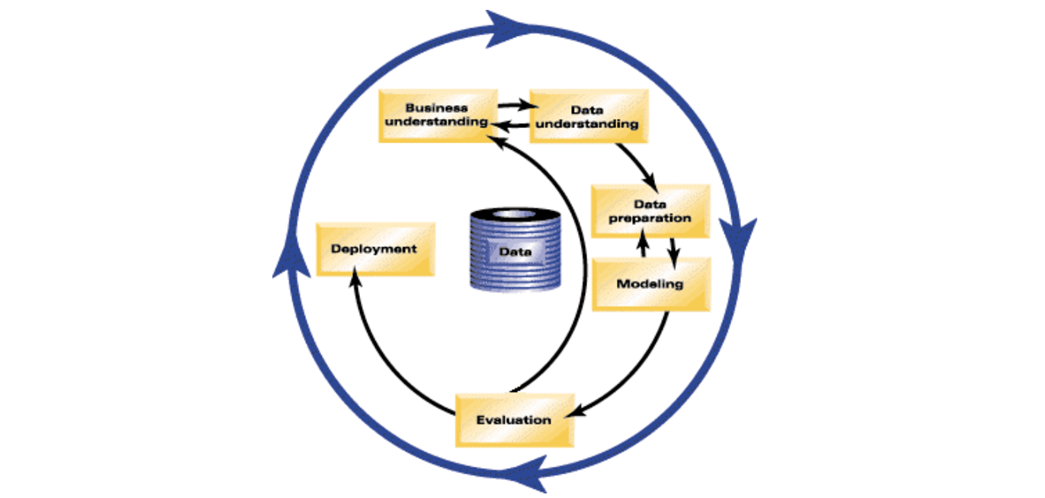

*Мы с Вами видим первый шаг Business understanding (Понимание бизнеса).* 

Этот этап является наиболее важным, потому что именно здесь излагается намерение проекта. Данный этап требует общения и ясности. Трудность здесь заключается в том, что заинтересованные стороны имеют разные цели, предубеждения и способы передачи информации. Они не все видят одни и те же вещи или в одной и той же манере. Без четкого, краткого и полного представления о целях проекта ресурсы будут бесполезно расходоваться.

**Применительно к проекту, который я выполняю, моя задача сформировать правильное понимание бизнеса у себя, чтобы оно было соотнесено с пониманием  специалистов команды сопровождения: тимлида, старшим коллегой.**

### Четко, кратко и полно представляю цели проекта:

1) Сфера бизнеса: телекоммуникация (это передача информации различными видами технологий по проводным, радио-, оптическим или другим электромагнитным системам. Она берет свое начало в стремлении людей к общению на расстоянии);

2) Условие задачи: есть доля пользователей телефонной связи и доля интернет-пользователей;

3) Бизнес проблема (боль): отток клиентов;

4) Цель: Требуется проработка способов удержания клиентов.

## Изучение данных из файла

*Переходим к следующему важному этапу методологии CRISP-DM "Data understanding"*

In [1]:
# Все библиотеки лучше импортировать в начале файла. Об этом говорится в стилевом гайде по питону
# В иследовании я буду использовать все библиотеки, которые были мной изучены в рамках обучения в Яндекс.Практикум
# Импортирую библиотеку pandas как главного инструмента для решения поставленных задач
import pandas as pd
# импортирую библиотеку seaborn как главного инструмента для визуализации
import seaborn as sns
# импортирую библиотеку matplotlib для визуализации
import matplotlib.pyplot as plt
# импортирую библиотеку scipy для выполнения статистических расчётов
from scipy import stats as st
# импортирую библиотеку numpy для работы с массивами данных
import numpy as np
# импортирую библиотеку для работы со временем
from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# алгоритм классификации случайный лес
from sklearn.ensemble import RandomForestClassifier
# алгоритм классификации логическая регрессия
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier

!pip install catboost
from catboost import CatBoostClassifier

from sklearn.dummy import DummyClassifier
# выберу стиль для plt инструментов
plt.style.use('ggplot')
rand_stat = 12345

In [2]:
# вставляем пути к файлам в переменных path
path_1 = r"E:\Data science\Яндекс_Практикум\final_provider_18\final_provider\final_provider\contract.csv"
path_2 = r"E:\Data science\Яндекс_Практикум\final_provider_18\final_provider\final_provider\internet.csv"
path_3 = r"E:\Data science\Яндекс_Практикум\final_provider_18\final_provider\final_provider\personal.csv"
path_4 = r"E:\Data science\Яндекс_Практикум\final_provider_18\final_provider\final_provider\phone.csv"

In [3]:
# открываем файлы, создаем профильные переменные
df_contract = pd.read_csv(path_1)
df_internet = pd.read_csv(path_2)
df_personal = pd.read_csv(path_3)
df_phone = pd.read_csv(path_4)

**Можем приступать к процессу первичного визуального изучения данных в четырех наборах данных согласно условиям кейса**

In [4]:
# откроем и посомтрим первые 5 строк df_contract
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
# откроем и посомтрим последние 10 строк df_contract
df_contract.tail(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7033,9767-FFLEM,2016-12-01,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25
7034,0639-TSIQW,2014-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),102.95,6886.25
7035,8456-QDAVC,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1
7036,7750-EYXWZ,2019-02-01,No,One year,No,Electronic check,60.65,743.3
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


#### Выводы по итогам визуального изучения данных:
1) наименования атрибутов представлены в плохом стиле, 'змеинный регистр' не соблюден, это минус;

2) заметна необходимость приведения всех данных к нижнему регистру;

3) Значения NaN (отсутствующее в ячейке число) и значения None (нечисловой тип 'NoneType') при первичном осмотре не установлены, это плюс, но совсем исключать этот вопрос нельзя, необходимо убедиться в их отсутствии.

In [6]:
# пришло время получить общую информацию о данных в таблице df_contract
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


**Попробуем описать данные**

*Таблица df_contract (содержит сведения о контрактах):*
- customerID - индивидуальный номер заказчика, тип данных object, норм;
- BeginDate - дата начала пользования услугами, тип данных object, не норм, требуется замена на datetime;
- EndDate - дата окончания пользования услугами, тип данных object, норм, с учетом наличия данных в свойственном типе;
- Type - тип оплаты: ежемесячный, годовой и тд, тип данных object, норм;
- PaperlessBilling - безналичный расчет, тип данных object, норм;
- PaymentMethod - способ оплаты, тип данных object, норм;
- MonthlyCharges - ежемесячные траты на услуги, тип данных float64, норм;
- TotalCharges - всего потрачено денег на услуги, тип данных object, не норм, нужно приводить в числовой тип данных.

In [7]:
# приступим к рассмотрению следующего на очереди фрейма данных df_internet
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [8]:
# посмотрим содержание последних 10-ти строк
df_internet.tail(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5507,6894-LFHLY,Fiber optic,No,No,No,No,No,No
5508,9767-FFLEM,Fiber optic,No,No,No,No,No,No
5509,0639-TSIQW,Fiber optic,Yes,Yes,Yes,No,Yes,No
5510,8456-QDAVC,Fiber optic,No,No,No,No,Yes,No
5511,7750-EYXWZ,DSL,No,Yes,Yes,Yes,Yes,Yes
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


#### Выводы по итогам визуального изучения данных:
1) наименования атрибутов представлены в плохом стиле, 'змеинный регистр' не соблюден, это минус;

2) заметна необходимость приведения всех данных к нижнему регистру;

3) Значения NaN (отсутствующее в ячейке число) и значения None (нечисловой тип 'NoneType') при первичном осмотре не установлены, это плюс, но совсем исключать этот вопрос нельзя, необходимо убедиться в их отсутствии.

In [9]:
# пришло время получить общую информацию о данных в таблице df_internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


**Попробуем описать данные**

*Таблица df_internet (содержит сведения об условиях подключения Интернета заказчикам):*
- customerID - индивидуальный номер заказчика, тип данных object, норм;
- InternetService - интернет-сервис, тип данных  object, норм;
- OnlineSecurity - опция защиты и безопасности, тип данных  object, норм;
- DeviceProtection - защита устройства, тип данных  object, норм;
- TechSupport - техподдержка, тип данных  object, норм;
- StreamingTV - потоковое телевидение, тип данных  object, норм;
- StreamingMovies - потоковое воспроизведение фильмов, тип данных  object, норм.

In [10]:
# следующие на очереди данные во фрейме df_personal
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
df_personal.tail(10) 

,customerID,gender,SeniorCitizen,Partner,Dependents
7033,9767-FFLEM,Male,0,No,No
7034,0639-TSIQW,Female,0,No,No
7035,8456-QDAVC,Male,0,No,No
7036,7750-EYXWZ,Female,0,No,No
7037,2569-WGERO,Female,0,No,No
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


#### Выводы по итогам визуального изучения данных:
1) наименования атрибутов представлены в плохом стиле, 'змеинный регистр' не соблюден, это минус;

2) заметна необходимость приведения всех данных к нижнему регистру;

3) Значения NaN (отсутствующее в ячейке число) и значения None (нечисловой тип 'NoneType') при первичном осмотре не установлены, это плюс, но совсем исключать этот вопрос нельзя, необходимо убедиться в их отсутствии.

In [12]:
# посмотрим на общую информацию df_personal
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


**Попробуем описать данные**

*Таблица df_personal (содержит сведения о персоне):*
- customerID - индивидуальный номер заказчика, тип данных object, норм;
- gender - пол, тип данных object, норм;
- SeniorCitizen - наличие пенсионного статуса по возрасту, бинарный тип данных, int64 норм;
- Partner - наличие супруга(и), тип данных object, норм;
- Dependents - наличие иждивенцов,  тип данных object, норм.

In [13]:
# последний на очереди рассмотрения фрейм данных
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [14]:
# смотрим нижние 5 строк
df_phone.tail()

,customerID,MultipleLines
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes
6360,3186-AJIEK,No


#### Выводы по итогам визуального изучения данных:
1) наименования атрибутов представлены в плохом стиле, 'змеинный регистр' не соблюден, это минус;

2) заметна необходимость приведения всех данных к нижнему регистру;

3) Значения NaN (отсутствующее в ячейке число) и значения None (нечисловой тип 'NoneType') при первичном осмотре не установлены, это плюс, но совсем исключать этот вопрос нельзя, необходимо убедиться в их отсутствии.

In [15]:
# изучим общую информацию
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


**Попробуем описать данные**

*Таблица df_phone (содержит сведения о возможности тарифа телефона):*
- customerID - индивидуальный номер заказчика, тип данных object, норм;
- MultipleLines - наличие возможности ведения параллельных линий во время звонка, тип данных object, норм.

### Вывод

- во всех четырех фреймах данных требуется проведение работы по предобработке;
- соразмерность данных наблюдается только в двух датасетах df_contract и df_personal по 7043 строк, в оставшихся двух датасетах данных несоизмеримо меньше, требуется дополнительная проработка в части необходимости использования данных датасетов для решения задачи: сравните поведение клиентов этих двух групп. Для каждой постройте два любых графика, изображающих долю пользователей телефонной связи и долю интернет-пользователей. Возниакает вопрос по какому критерию сравнить поведение?
- не совсем понятно значение MultipleLines в таблице df_phone (вопрос снимается после встречи с тимлидом);


## Предобработка данных

После первичного осмотра данные должны быть преобразованы в пригодное для использования подмножество, если только не будет определено, что требуется больше данных. После выбора набора данных его необходимо проверить на наличие сомнительных, отсутствующих или неоднозначных случаев. Подготовка данных является важным этапом в методологии CRISP-DM.

In [16]:
# проверим данные во всех датафреймах на наличие пропусков
(df_contract.isna().sum())

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [17]:
(df_internet.isna().sum())

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [18]:
(df_personal.isna().sum())

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [19]:
(df_phone.isna().sum())

customerID       0
MultipleLines    0
dtype: int64

**Предварительный вывод:** *У нас хорошие новости, во всех датасетах отсутствуют пропуски в данных.*

In [20]:
# проверим наши данные на наличие явных дубликатов
(df_contract.duplicated().sum())

0

In [21]:
(df_internet.duplicated().sum())

0

In [22]:
(df_personal.duplicated().sum())

0

In [23]:
(df_phone.duplicated().sum())

0

**Предварительный вывод:** *У нас еще одна хорошая новость, во всех датасетах отсутствуют явные дубликаты (вместе с тем операцию по поиску дубликатов стоит повторить после приведения всех данных к нижнему регистру).*

In [24]:
# в фрейме данных df_contract необходимо осуществить предобратку данных: 
# 1) BeginDate замена типа данных на datatime
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format='%Y-%m-%d', errors='coerce')

In [25]:
# проверим смену типа данных в 'BeginDate'
df_contract['BeginDate'].dtypes

dtype('<M8[ns]')

In [26]:
# 2 EndDate замена типа данных на datatime
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], format='%Y-%m-%d', errors='coerce')

In [27]:
df_contract['EndDate'].dtypes

dtype('<M8[ns]')

In [28]:
# TotalCharges замена типа данных на вещественный числовый тип;
# убираем лишние ковычки, чтобы провести операцию по смене типа данных object на float
df_contract['TotalCharges'] = df_contract['TotalCharges'].replace(' ','')

In [29]:
# убедимся, что у нас тип данных object
df_contract['TotalCharges'].dtypes

dtype('O')

In [30]:
# проведем смену типа данных на float
df_contract['TotalCharges'] = df_contract['TotalCharges'].apply(pd.to_numeric)

In [31]:
# проверим результат
df_contract['TotalCharges'].dtypes

dtype('float64')

In [32]:
# для предварительной подготовки к исследованию данных приведем все данные object в датасете к нижнему регистру
df_contract[['customerID', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod']] = df_contract[['customerID', 
                                                                                          'EndDate', 
                                                                                          'Type', 
                                                                                          'PaperlessBilling', 
                                                                                          'PaymentMethod']].astype(str).apply(lambda x: x.str.lower())

In [33]:
# посмотрим на результат 
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-vhveg,2020-01-01,nat,month-to-month,yes,electronic check,29.85,29.85
1,5575-gnvde,2017-04-01,nat,one year,no,mailed check,56.95,1889.50
2,3668-qpybk,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15
3,7795-cfocw,2016-05-01,nat,one year,no,bank transfer (automatic),42.30,1840.75
4,9237-hqitu,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65


In [34]:
# теперь обеспечим соблюдение правила хорошего тона написания кода, устраним "верблюжий регистр" - обеспечим соблюдение 
# "змеиного регистра"
df_contract = df_contract.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 'EndDate': 'end_date',\
                        'Type': 'type', 'PaperlessBilling': 'paperless_billing', 'PaymentMethod': 'payment_method',\
                                          'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges'})

In [35]:
# посмотрим на результат 
df_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-vhveg,2020-01-01,nat,month-to-month,yes,electronic check,29.85,29.85
1,5575-gnvde,2017-04-01,nat,one year,no,mailed check,56.95,1889.50
2,3668-qpybk,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15
3,7795-cfocw,2016-05-01,nat,one year,no,bank transfer (automatic),42.30,1840.75
4,9237-hqitu,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65


In [36]:
# проверим наши данные на наличие явных дубликатов еще раз
(df_contract.duplicated().sum())

0

In [37]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [38]:
# проделаем такую же последовательность работы с df_internet
# для предварительной подготовки к исследованию данных приведем все данные object в датасете к нижнему регистру
df_internet[['customerID','InternetService','OnlineSecurity',
             'OnlineBackup','DeviceProtection','TechSupport',
             'StreamingTV','StreamingMovies']] = df_internet[['customerID','InternetService',
                                                              'OnlineSecurity','OnlineBackup',
                                                              'DeviceProtection','TechSupport','StreamingTV',
                                                              'StreamingMovies']].astype(str).apply(lambda x: x.str.lower())


In [39]:
# посмотрим
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-vhveg,dsl,no,yes,no,no,no,no
1,5575-gnvde,dsl,yes,no,yes,no,no,no
2,3668-qpybk,dsl,yes,yes,no,no,no,no
3,7795-cfocw,dsl,yes,no,yes,yes,no,no
4,9237-hqitu,fiber optic,no,no,no,no,no,no


In [40]:
df_internet = df_internet.rename(columns={'customerID': 'customer_id', 'InternetService': 'internet_service', 'OnlineSecurity': 'online_security',\
                        'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection', 'TechSupport': 'tech_support',\
                                          'StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_movies'})

In [41]:
# посмотрим
df_internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-vhveg,dsl,no,yes,no,no,no,no
1,5575-gnvde,dsl,yes,no,yes,no,no,no
2,3668-qpybk,dsl,yes,yes,no,no,no,no
3,7795-cfocw,dsl,yes,no,yes,yes,no,no
4,9237-hqitu,fiber optic,no,no,no,no,no,no


In [42]:
# проделаем такую же последовательность работы с df_personal
df_personal[['customerID','gender',
             'SeniorCitizen','Partner','Dependents']] = df_personal[['customerID','gender',
                                                                      'SeniorCitizen','Partner',
                                                                      'Dependents']].astype(str).apply(lambda x: x.str.lower())

In [43]:
# убедимся, что код работает
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-vhveg,female,0,yes,no
1,5575-gnvde,male,0,no,no
2,3668-qpybk,male,0,no,no
3,7795-cfocw,male,0,no,no
4,9237-hqitu,female,0,no,no


In [44]:
df_personal = df_personal.rename(columns={'customerID': 'customer_id', 
                                          'SeniorCitizen': 'senior_citizen', 'Partner':'partner', 'Dependents':'dependents'})

In [45]:
# убедимся, что код работает
df_personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-vhveg,female,0,yes,no
1,5575-gnvde,male,0,no,no
2,3668-qpybk,male,0,no,no
3,7795-cfocw,male,0,no,no
4,9237-hqitu,female,0,no,no


In [46]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [47]:
df_phone[['customerID', 'MultipleLines']] = df_phone[['customerID', 
                                                      'MultipleLines']].astype(str).apply(lambda x: x.str.lower())

In [48]:
# наводим порядок в фрейме df_phone
df_phone.head()

,customerID,MultipleLines
0,5575-gnvde,no
1,3668-qpybk,no
2,9237-hqitu,no
3,9305-cdskc,yes
4,1452-kiovk,yes


In [49]:
df_phone= df_phone.rename(columns={'customerID': 'customer_id', 'MultipleLines':'multiple_lines'})

In [50]:
df_phone.head(2)

,customer_id,multiple_lines
0,5575-gnvde,no
1,3668-qpybk,no


**Вывод по подразделу подготовка данных**: *В работе с учетом намеченного плана действий осуществлена подготовка данных, переходим к следующему этапу работы* 

## Моделирование 

*После того, как данные подготовлены к использованию, они должны быть выражены с помощью любых подходящих моделей, давать значимые идеи и, надеюсь, новые знания. Это цель интеллектуального анализа данных: создать информацию о знаниях, которая имеет смысл и полезность. Использование моделей выявляет закономерности и структуры в данных, которые дают представление об интересующих особенностях. Модели выбираются на основе части данных, и при необходимости вносятся корректировки. Выбор модели - это искусство и наука. Для последующего этапа требуются как Основополагающая методология, так и CRISP-DM.*


**В нашем распоряжении обучающий набор данных и пока еще не определенный целевой признак, который нужно предсказать по остальным признакам. Такие задачи относятся к классу «обучение с учителем». Целевой признак в нашей задаче нужно привести в категориальный, смысл которого заключается клиент ушел - 1 (булевое значение), клиент остался - 0 (булевое значение). Когда категорий всего две — например, уйдет или нет из телеком компании — речь идёт о бинарной (двоичной) классификации.**

In [51]:
# в первую очередь создадим объединенный датасет из всех имеющихся
# с помощью merge объединяю фреймы после предобработки df_contract, df_personal по общему столбцу customer_id
df = pd.merge(df_contract, df_personal, on = 'customer_id')

In [52]:
# посмотрим
df.head(3)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents
0,7590-vhveg,2020-01-01,nat,month-to-month,yes,electronic check,29.85,29.85,female,0,yes,no
1,5575-gnvde,2017-04-01,nat,one year,no,mailed check,56.95,1889.50,male,0,no,no
2,3668-qpybk,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,male,0,no,no


In [53]:
# далее добавим еще два фрейма df_internet и df_phone по общему столбцу customer_id
df = pd.merge(df, df_internet, on = 'customer_id', how = 'left')

In [54]:
# посмотрим
df.head(3)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-vhveg,2020-01-01,nat,month-to-month,yes,electronic check,29.85,29.85,female,0,yes,no,dsl,no,yes,no,no,no,no
1,5575-gnvde,2017-04-01,nat,one year,no,mailed check,56.95,1889.50,male,0,no,no,dsl,yes,no,yes,no,no,no
2,3668-qpybk,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,male,0,no,no,dsl,yes,yes,no,no,no,no


In [55]:
# повторим туже операцию для df_phone
df = pd.merge(df, df_phone, on = 'customer_id', how = 'left')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   object        
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

**Предварительный вывод:**
*Проделан важный шаг, мы объединили все в распоряжении фреймы данных в один датасет. Можем констатировать, что внашем датасете 19 фичей. Обращает внимание появление недостающих значений в отдельных столбцах, что не удивляет, ранее установлен факт, что в двух датасетах df_contract и df_personal по 7043 строк, в оставшихся двух датасетах данных несоизмеримо меньше и требуется дополнительная проработка данного вопроса.*

**Создаем целевой атрибут из 'end_date', нам надо привести его к бинарной классификации**

In [57]:
df['end_date'].dtype

dtype('O')

In [58]:
df['end_date'] = pd.to_datetime(df_contract['end_date'], format='%Y-%m-%d', errors='coerce')

In [59]:
df['target_attribute'] = np.where(df['end_date'].isna(), 0, 1)

In [60]:
display(df.head(10))

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target_attribute
0,7590-vhveg,2020-01-01,NaT,month-to-month,yes,electronic check,29.85,29.85,female,0,...,no,dsl,no,yes,no,no,no,no,NaN,0
1,5575-gnvde,2017-04-01,NaT,one year,no,mailed check,56.95,1889.50,male,0,...,no,dsl,yes,no,yes,no,no,no,no,0
2,3668-qpybk,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,male,0,...,no,dsl,yes,yes,no,no,no,no,no,1
3,7795-cfocw,2016-05-01,NaT,one year,no,bank transfer (automatic),42.30,1840.75,male,0,...,no,dsl,yes,no,yes,yes,no,no,NaN,0
4,9237-hqitu,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65,female,0,...,no,fiber optic,no,no,no,no,no,no,no,1
5,9305-cdskc,2019-03-01,2019-11-01,month-to-month,yes,electronic check,99.65,820.50,female,0,...,no,fiber optic,no,no,yes,no,yes,yes,yes,1
6,1452-kiovk,2018-04-01,NaT,month-to-month,yes,credit card (automatic),89.10,1949.40,male,0,...,yes,fiber optic,no,yes,no,no,yes,no,yes,0
7,6713-okomc,2019-04-01,NaT,month-to-month,no,mailed check,29.75,301.90,female,0,...,no,dsl,yes,no,no,no,no,no,NaN,0
8,7892-pookp,2017-07-01,2019-11-01,month-to-month,yes,electronic check,104.80,3046.05,female,0,...,no,fiber optic,no,no,yes,yes,yes,yes,yes,1
9,6388-tabgu,2014-12-01,NaT,one year,no,bank transfer (automatic),56.15,3487.95,male,0,...,yes,dsl,yes,yes,no,no,no,no,no,0


*Для дальшнейшей работы нам нужен отдельный столбец "Время жизни клиента" - Customer lifetime) который мы можем получить путем расчета разницы начала прихода (begin_date) и конца пользования (end_date). Проведем далее эту операцию.*

In [61]:
# значение Nat в солбце 'end_date' поменяем на дату окончания договора, 
# так мы получим наиболее релевантное значение времени жизни клиента
# такая операция позволит нам провести процесс вычитания между показателями атрибутов
df['end_date'].fillna(pd.Timestamp('2020-02-01'), inplace = True)

In [62]:
df['end_date'].head()

0   2020-02-01
1   2020-02-01
2   2019-12-01
3   2020-02-01
4   2019-11-01
Name: end_date, dtype: datetime64[ns]

In [63]:
# убедимся что с типом данных все в порядке
df['end_date'].dtype

dtype('<M8[ns]')

In [64]:
# осуществляем задуманное, создаем отдельный столбец "Время жизни клиента" 
df['сustomer_lifetime'] = (((df['end_date'] - df['begin_date']) / np.timedelta64(1, 'M')).round()).astype(int)

In [65]:
# проверяем, что все ок
df['сustomer_lifetime'].head()

0     1
1    34
2     2
3    45
4     2
Name: сustomer_lifetime, dtype: int32

In [66]:
# посмотрим на наш датасет
display(df.head())

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target_attribute,сustomer_lifetime
0,7590-vhveg,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85,female,0,...,dsl,no,yes,no,no,no,no,NaN,0,1
1,5575-gnvde,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.50,male,0,...,dsl,yes,no,yes,no,no,no,no,0,34
2,3668-qpybk,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15,male,0,...,dsl,yes,yes,no,no,no,no,no,1,2
3,7795-cfocw,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1840.75,male,0,...,dsl,yes,no,yes,yes,no,no,NaN,0,45
4,9237-hqitu,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65,female,0,...,fiber optic,no,no,no,no,no,no,no,1,2


In [67]:
# следующим шагом предлагается использование техники прямого кодировани или отображения One-Hot Encoding
one_hot_encoding = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                    'streaming_movies', 'multiple_lines']

In [68]:
# создаем функцию One-Hot Encoding
for i in one_hot_encoding:
  df[i].fillna('No', inplace = True)

In [69]:
df = pd.get_dummies(df, columns = ['type', 'paperless_billing', 'payment_method',
       'gender', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'], 
       drop_first = True)

In [70]:
# посмотрим на датасет
df.head()

,customer_id,begin_date,end_date,monthly_charges,total_charges,senior_citizen,target_attribute,сustomer_lifetime,type_one year,type_two year,...,device_protection_no,device_protection_yes,tech_support_no,tech_support_yes,streaming_tv_no,streaming_tv_yes,streaming_movies_no,streaming_movies_yes,multiple_lines_no,multiple_lines_yes
0,7590-vhveg,2020-01-01,2020-02-01,29.85,29.85,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
1,5575-gnvde,2017-04-01,2020-02-01,56.95,1889.50,0,0,34,1,0,...,0,1,1,0,1,0,1,0,1,0
2,3668-qpybk,2019-10-01,2019-12-01,53.85,108.15,0,1,2,0,0,...,1,0,1,0,1,0,1,0,1,0
3,7795-cfocw,2016-05-01,2020-02-01,42.30,1840.75,0,0,45,1,0,...,0,1,0,1,1,0,1,0,0,0
4,9237-hqitu,2019-09-01,2019-11-01,70.70,151.65,0,1,2,0,0,...,1,0,1,0,1,0,1,0,1,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   customer_id                             7043 non-null   object        
 1   begin_date                              7043 non-null   datetime64[ns]
 2   end_date                                7043 non-null   datetime64[ns]
 3   monthly_charges                         7043 non-null   float64       
 4   total_charges                           7032 non-null   float64       
 5   senior_citizen                          7043 non-null   object        
 6   target_attribute                        7043 non-null   int32         
 7   сustomer_lifetime                       7043 non-null   int32         
 8   type_one year                           7043 non-null   uint8         
 9   type_two year                           7043 non-nul

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001DC0841BCD0>, <matplotlib.lines.Line2D object at 0x000001DC08B08070>], 'caps': [<matplotlib.lines.Line2D object at 0x000001DC08B083D0>, <matplotlib.lines.Line2D object at 0x000001DC08B08730>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001DC0841B970>], 'medians': [<matplotlib.lines.Line2D object at 0x000001DC08B08A90>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001DC08B08DF0>], 'means': []})

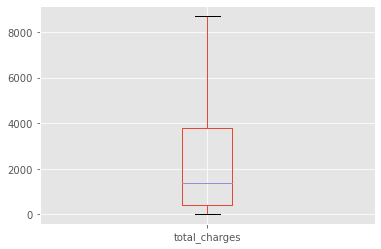

In [72]:
# отдельно стоит посмотреть на наличие аномалий в датасете, чтобы создать условия для выбора лучшей модели
# наиболее подходящм для этой цели является показатель total_charges
df['total_charges'].plot.box(return_type='both')

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001DC090A1BE0>, <matplotlib.lines.Line2D object at 0x000001DC090A1F40>], 'caps': [<matplotlib.lines.Line2D object at 0x000001DC090B0310>, <matplotlib.lines.Line2D object at 0x000001DC090B0670>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001DC090A1880>], 'medians': [<matplotlib.lines.Line2D object at 0x000001DC090B09D0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001DC090B0D30>], 'means': []})

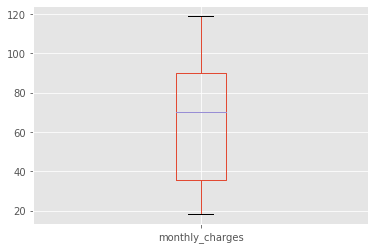

In [73]:
# посмотрим на monthly_charges
df['monthly_charges'].plot.box(return_type='both')

*Выбросов (аномалий) на графиках не видно*

In [74]:
# посмотрим на бинарную разбивку по классам
df['target_attribute'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: target_attribute, dtype: float64

*Видим фактические значения, которые говорят нам о том, что из 100 % клиентов «Ниединогоразрыва.ком» остались практически - 73 %, убыло - 27 %.*

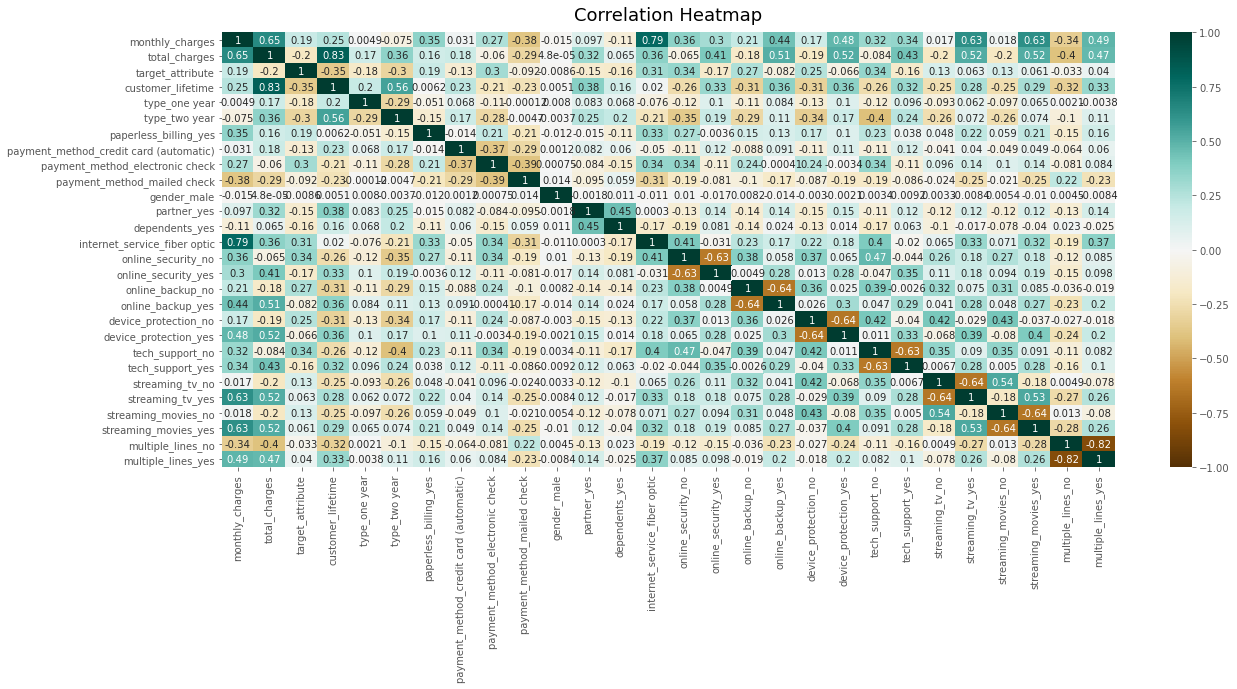

In [75]:
# использую тепловую карту для визуального анализа
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

- Слабая корреляция: monthly_charges, total_charges, type_one year, paperless_billing_yes, payment_method_credit card (automatic), payment_method_mailed check, gender_male, partner_yes, dependents_yes, online_security_yes, online_backup_no, ,   device_protection_yes, tech_support_no, streaming_tv_no, streaming_tv_yes, streaming_movies_no, streaming_movies_yes, multiple_lines_no, multiple_lines_yes

- Сильная корреляция: сustomer_lifetime, type_two year, payment_method_electronic check, internet_service_fiber optic, online_security_no , online_backup_yes, device_protection_no, tech_support_yes

In [76]:
# вызывает любопытство какое количество мужчин и женщин в числе клиентов 
df['gender_male'].value_counts()

1    3555
0    3488
Name: gender_male, dtype: int64

*Мужчин в числе клиентов незначительно больше женщин, но в целом соотношение одинаковое.*

In [77]:
# посмотрим на фичи, которые оказывают наибольшее влияние на наш target_attribute
num_col = []
bin_col = []

for col in df.columns.drop('target_attribute'):
  if len(df[col].value_counts()) < 3:
    bin_col.append(df[col].name)
  else:
    num_col.append(df[col].name)

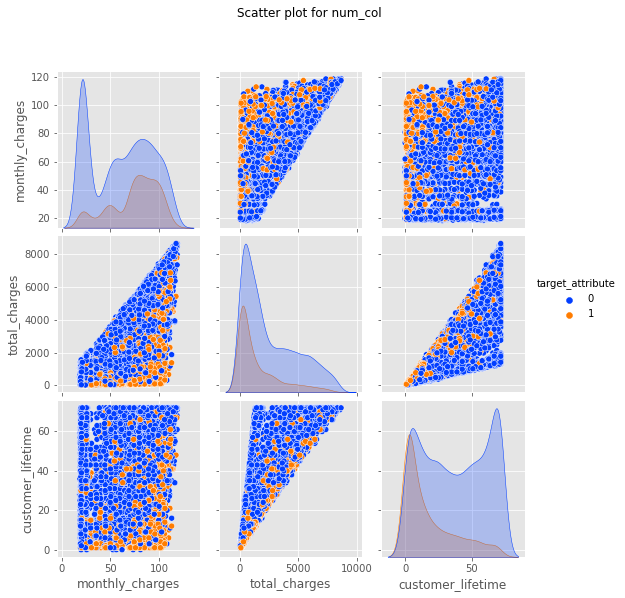

In [78]:
cor = num_col + ['target_attribute']

pair_df = df[cor].copy()

map_corr = sns.pairplot(pair_df, hue='target_attribute', palette = 'bright')
map_corr.fig.suptitle('Scatter plot for num_col', y = 1.1)
plt.show()

*Анализируя представленный график мы можем обратить внимание на слудующие закономерности:*
- те клиенты, которые меньше платят за услуги телеком компании, гораздо реже уходят;
- как правило уходят клиенты, которые недавно подключились. 

### Исследование моделей

*Прежде чем приступать к разработке модели машинного обучения уберу лишние на мой взгляд фичи, такие как: 'begin_date', 'end_date', 'customer_id', 'gender_male', 'partner_yes', 'senior_citizen'*

In [79]:
df.drop(['begin_date', 'end_date', 'customer_id', 
         'gender_male', 'partner_yes','senior_citizen'], axis = 1, inplace = True)

*После того как у нас сформирован датасет можно приступать к следующему этапу, подбору моделей, которые покажут 0.85 ≤ AUC-ROC < 0.87*

In [80]:
features = df.drop(['target_attribute', 'total_charges'], axis = 1)

In [81]:
target = df['target_attribute']

In [82]:
x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.2, random_state = 12345, stratify = target)

In [83]:
num_col = ['monthly_charges', 'сustomer_lifetime']

scaler = StandardScaler()

x_train[num_col] = scaler.fit_transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

<ipython-input-83-485bfc2066f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_col] = scaler.fit_transform(x_train[num_col])
D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-83-485bfc2066f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [84]:
# фичи готовы
features

,monthly_charges,сustomer_lifetime,type_one year,type_two year,paperless_billing_yes,payment_method_credit card (automatic),payment_method_electronic check,payment_method_mailed check,dependents_yes,internet_service_fiber optic,...,device_protection_no,device_protection_yes,tech_support_no,tech_support_yes,streaming_tv_no,streaming_tv_yes,streaming_movies_no,streaming_movies_yes,multiple_lines_no,multiple_lines_yes
0,29.85,1,0,0,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1,56.95,34,1,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
2,53.85,2,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,42.30,45,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,0
4,70.70,2,0,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,24,1,0,1,0,0,1,1,0,...,0,1,0,1,0,1,0,1,0,1
7039,103.20,72,1,0,1,1,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1
7040,29.60,11,0,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
7041,74.40,4,0,0,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,1


### Проводим изучение моделей

In [85]:
# для начала подготовим функцию, которая бeдет подбирать лучшую модель
def grid(name, model, params):
  clf = GridSearchCV(estimator = model, param_grid = params, cv = 5, scoring = 'roc_auc', n_jobs = -1)
  clf.fit(x_train, y_train)
  print('Parametrs of best Model', clf.best_estimator_)
  res = pd.DataFrame({'ROC-AUC_train': round(clf.best_score_, 4)}, index = [name])
  display(res)
  return clf.best_estimator_

### Начнем с модели Случайный лес

In [86]:
name_rf = 'RandomForestClassifier'
model_rf = RandomForestClassifier(class_weight = 'balanced', random_state = 12345)
params_rf = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100],
    'min_samples_split' : [2, 8, 16],
    'min_samples_leaf' : [2, 6, 20]
}

In [87]:
best_rf = grid(name_rf, model_rf, params_rf)

Parametrs of best Model RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=20, n_estimators=50,
                       random_state=12345)


,ROC-AUC_train
RandomForestClassifier,0.8483


### модель Логистическая регрессия

In [88]:
name_lr = 'LogisticRegression'
model_lr = LogisticRegression(class_weight = 'balanced', random_state = 12345)
params_lr = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

In [89]:
best_lr = grid(name_lr, model_lr, params_lr)

Parametrs of best Model LogisticRegression(class_weight='balanced', penalty='l1', random_state=12345,
                   solver='saga')


,ROC-AUC_train
LogisticRegression,0.8449


### модель с Стохастическим градиентным спуском

In [90]:
name_sgd = 'SGDClassifier'
model_sgd = SGDClassifier(class_weight = 'balanced', random_state =12345)
params_sgd = {
    'fit_intercept': [True, False],
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge','perceptron'],
    'alpha': [0.000001,0.00001,0.00005,0.0001,0.0005,0.001]
}

In [91]:
best_sgd = grid(name_sgd, model_sgd, params_sgd)

Parametrs of best Model SGDClassifier(alpha=0.001, class_weight='balanced', loss='log', penalty='l1',
              random_state=12345)


,ROC-AUC_train
SGDClassifier,0.8444


### Модели с градиентным бустингом

In [92]:
name_cat = 'CatBoostClassifier'
model_cat = CatBoostClassifier(auto_class_weights = 'Balanced', random_seed = rand_stat, verbose=1000)
params_cat = {
    'learning_rate':[0.0001, 0.001, 0.01],
    'depth' : [7]
}

In [93]:
best_cat = grid(name_cat, model_cat, params_cat)

0:	learn: 0.6926449	total: 140ms	remaining: 2m 19s
999:	learn: 0.4930382	total: 11.6s	remaining: 0us
Parametrs of best Model <catboost.core.CatBoostClassifier object at 0x000001DC0B35A2E0>


,ROC-AUC_train
CatBoostClassifier,0.8487


In [94]:
# LGBMClassifier
name_lgbm = 'LGBMClassifier'
model_lgbm = LGBMClassifier(class_weight = 'balanced', random_state = rand_stat)
params_lgbm = {
    'n_estimators' : [100, 300, 500, 1000],
    'depth' : [40, 25, 20, 15],
    'learning_rate' : [0.1, 0.01, 0.001]
}

In [95]:
best_lgbm = grid(name_lgbm, model_lgbm, params_lgbm)

[LightGBM] [Warning] Unknown parameter: depth
Parametrs of best Model LGBMClassifier(class_weight='balanced', depth=40, learning_rate=0.01,
               n_estimators=300, random_state=12345)


,ROC-AUC_train
LGBMClassifier,0.8481


**Итоги подбора моделей:** *Лучший результат показала модель с градиентным бустингом CatBoostClassifier = 0.84, посмотрим как модель покажет себя на тесте*

In [96]:
result = pd.DataFrame(columns=['Name of model', 'ROC-AUC_train', 'ROC-AUC_test', 'Accuracy_test'])

In [97]:
# пропишем функцию для минимации ипользования кода
def test_sum(model, name):
  predict_pro_test = model.predict_proba(x_train)[:, 1]
  predict_pro = model.predict_proba(x_test)[:, 1]
  pred = model.predict(x_test)

  fpr, tpr, thresholds = roc_curve(y_test, predict_pro) 

  plt.figure(figsize=(10, 10))
  plt.plot(fpr, tpr, linestyle='-')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-curve')
  plt.show()
  auc = round(roc_auc_score(y_test, predict_pro), 4)
  acc = round(accuracy_score(y_test, pred), 4)
  train = round(roc_auc_score(y_train, predict_pro_test), 4)

  print("ROC-AUC:", auc)
  print('Accuracy:', acc)
  model_res = {'Name of model': name, 'ROC-AUC_train': train, 'ROC-AUC_test': auc, 'Accuracy_test': acc}
  return model_res

### Начнем со случайного леса

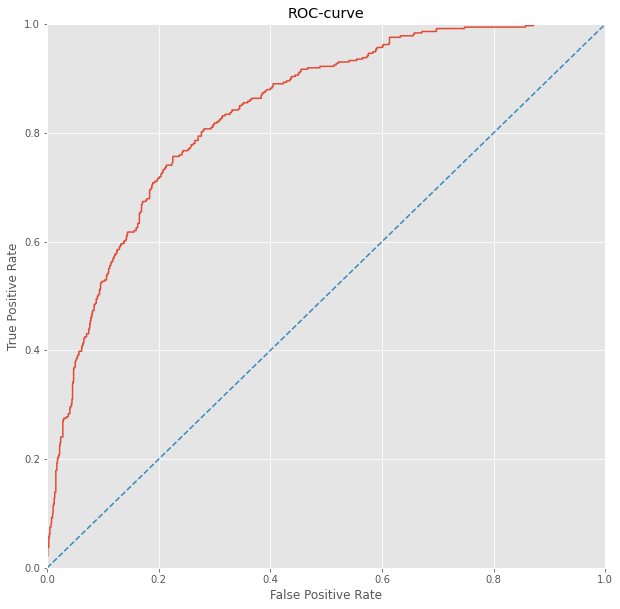

ROC-AUC: 0.8385
Accuracy: 0.7452


In [98]:
result = result.append(test_sum(best_rf, name_rf), ignore_index=True)

### Логистическая регрессия

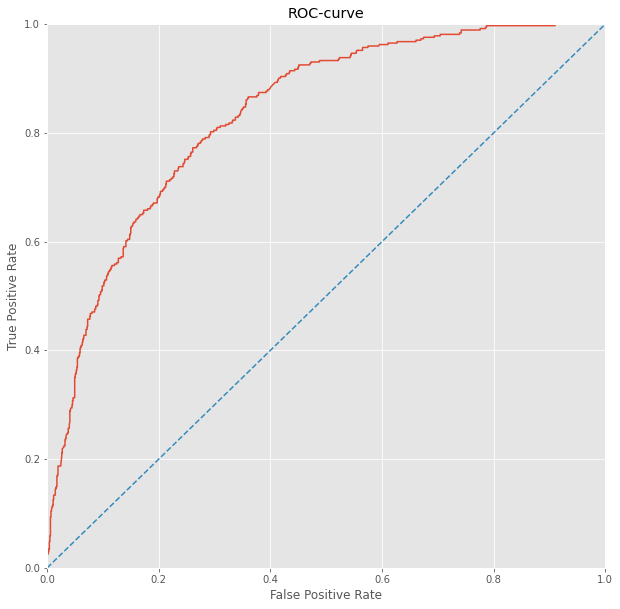

ROC-AUC: 0.8341
Accuracy: 0.7395


In [99]:
result = result.append(test_sum(best_lr, name_lr), ignore_index=True)

### модель с Стохастическим градиентным спуском

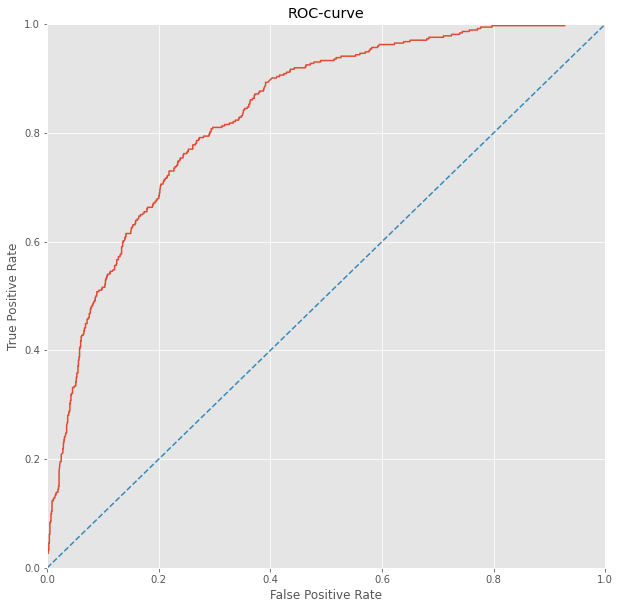

ROC-AUC: 0.8353
Accuracy: 0.7509


In [100]:
result = result.append(test_sum(best_sgd, name_sgd), ignore_index=True)

### Модель с градиентным бустингом

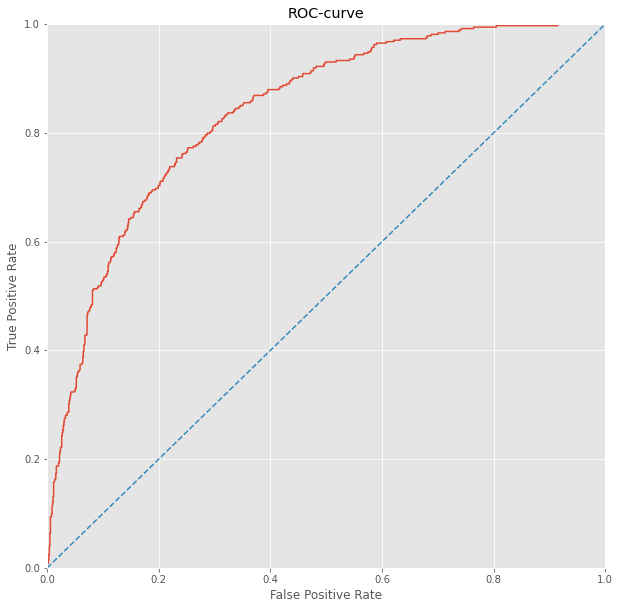

ROC-AUC: 0.8378
Accuracy: 0.7395


In [101]:
result = result.append(test_sum(best_cat, name_cat), ignore_index=True)

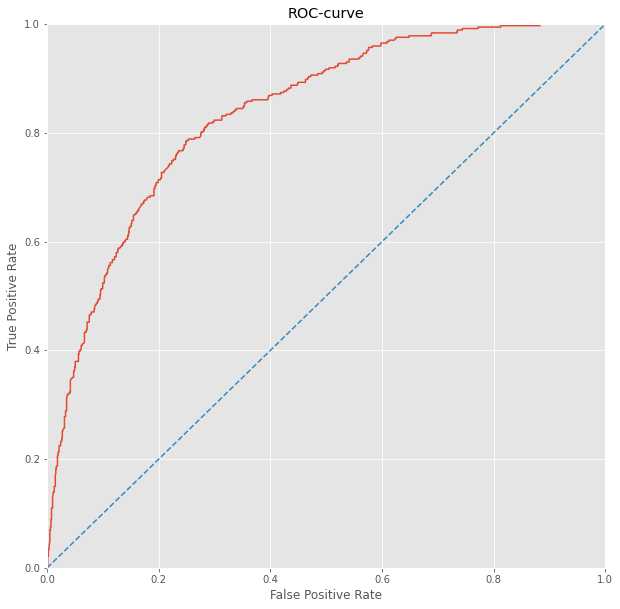

ROC-AUC: 0.8375
Accuracy: 0.7438


In [102]:
# lgbm
result = result.append(test_sum(best_lgbm, name_lgbm), ignore_index=True)

### Проверка на вменяемость

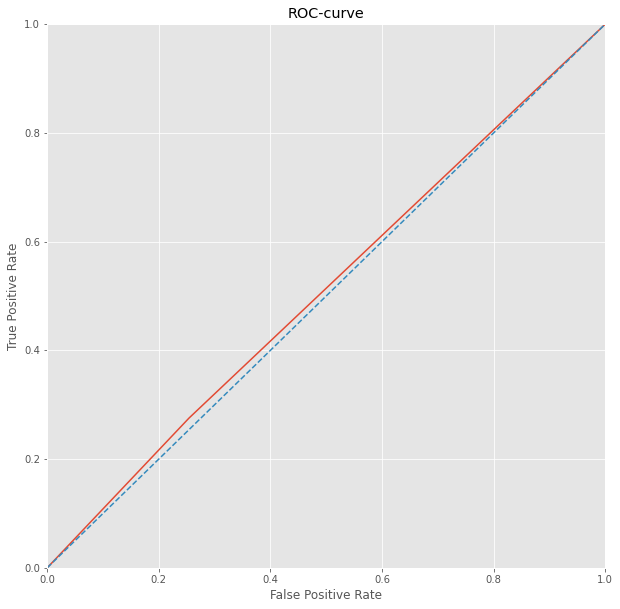

ROC-AUC: 0.5106
Accuracy: 0.6075


In [103]:
dum = DummyClassifier(strategy='stratified')

dum.fit(x_train, y_train)
name_dum = 'DummyClassifier'

result = result.append(test_sum(dum, name_dum), ignore_index=True)

In [104]:
# подведем итог работы
print(result.sort_values(by = 'ROC-AUC_test', ascending=False))

            Name of model  ROC-AUC_train  ROC-AUC_test  Accuracy_test
0  RandomForestClassifier         0.8754        0.8385         0.7452
3      CatBoostClassifier         0.8669        0.8378         0.7395
4          LGBMClassifier         0.8950        0.8375         0.7438
2           SGDClassifier         0.8473        0.8353         0.7509
1      LogisticRegression         0.8478        0.8341         0.7395
5         DummyClassifier         0.5018        0.5106         0.6075
